## Importing the librarires

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [6]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
df.dropna(inplace=True)

In [8]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

,count
Class,
0,284315
1,492


## performing EDA  

## Features Analysis

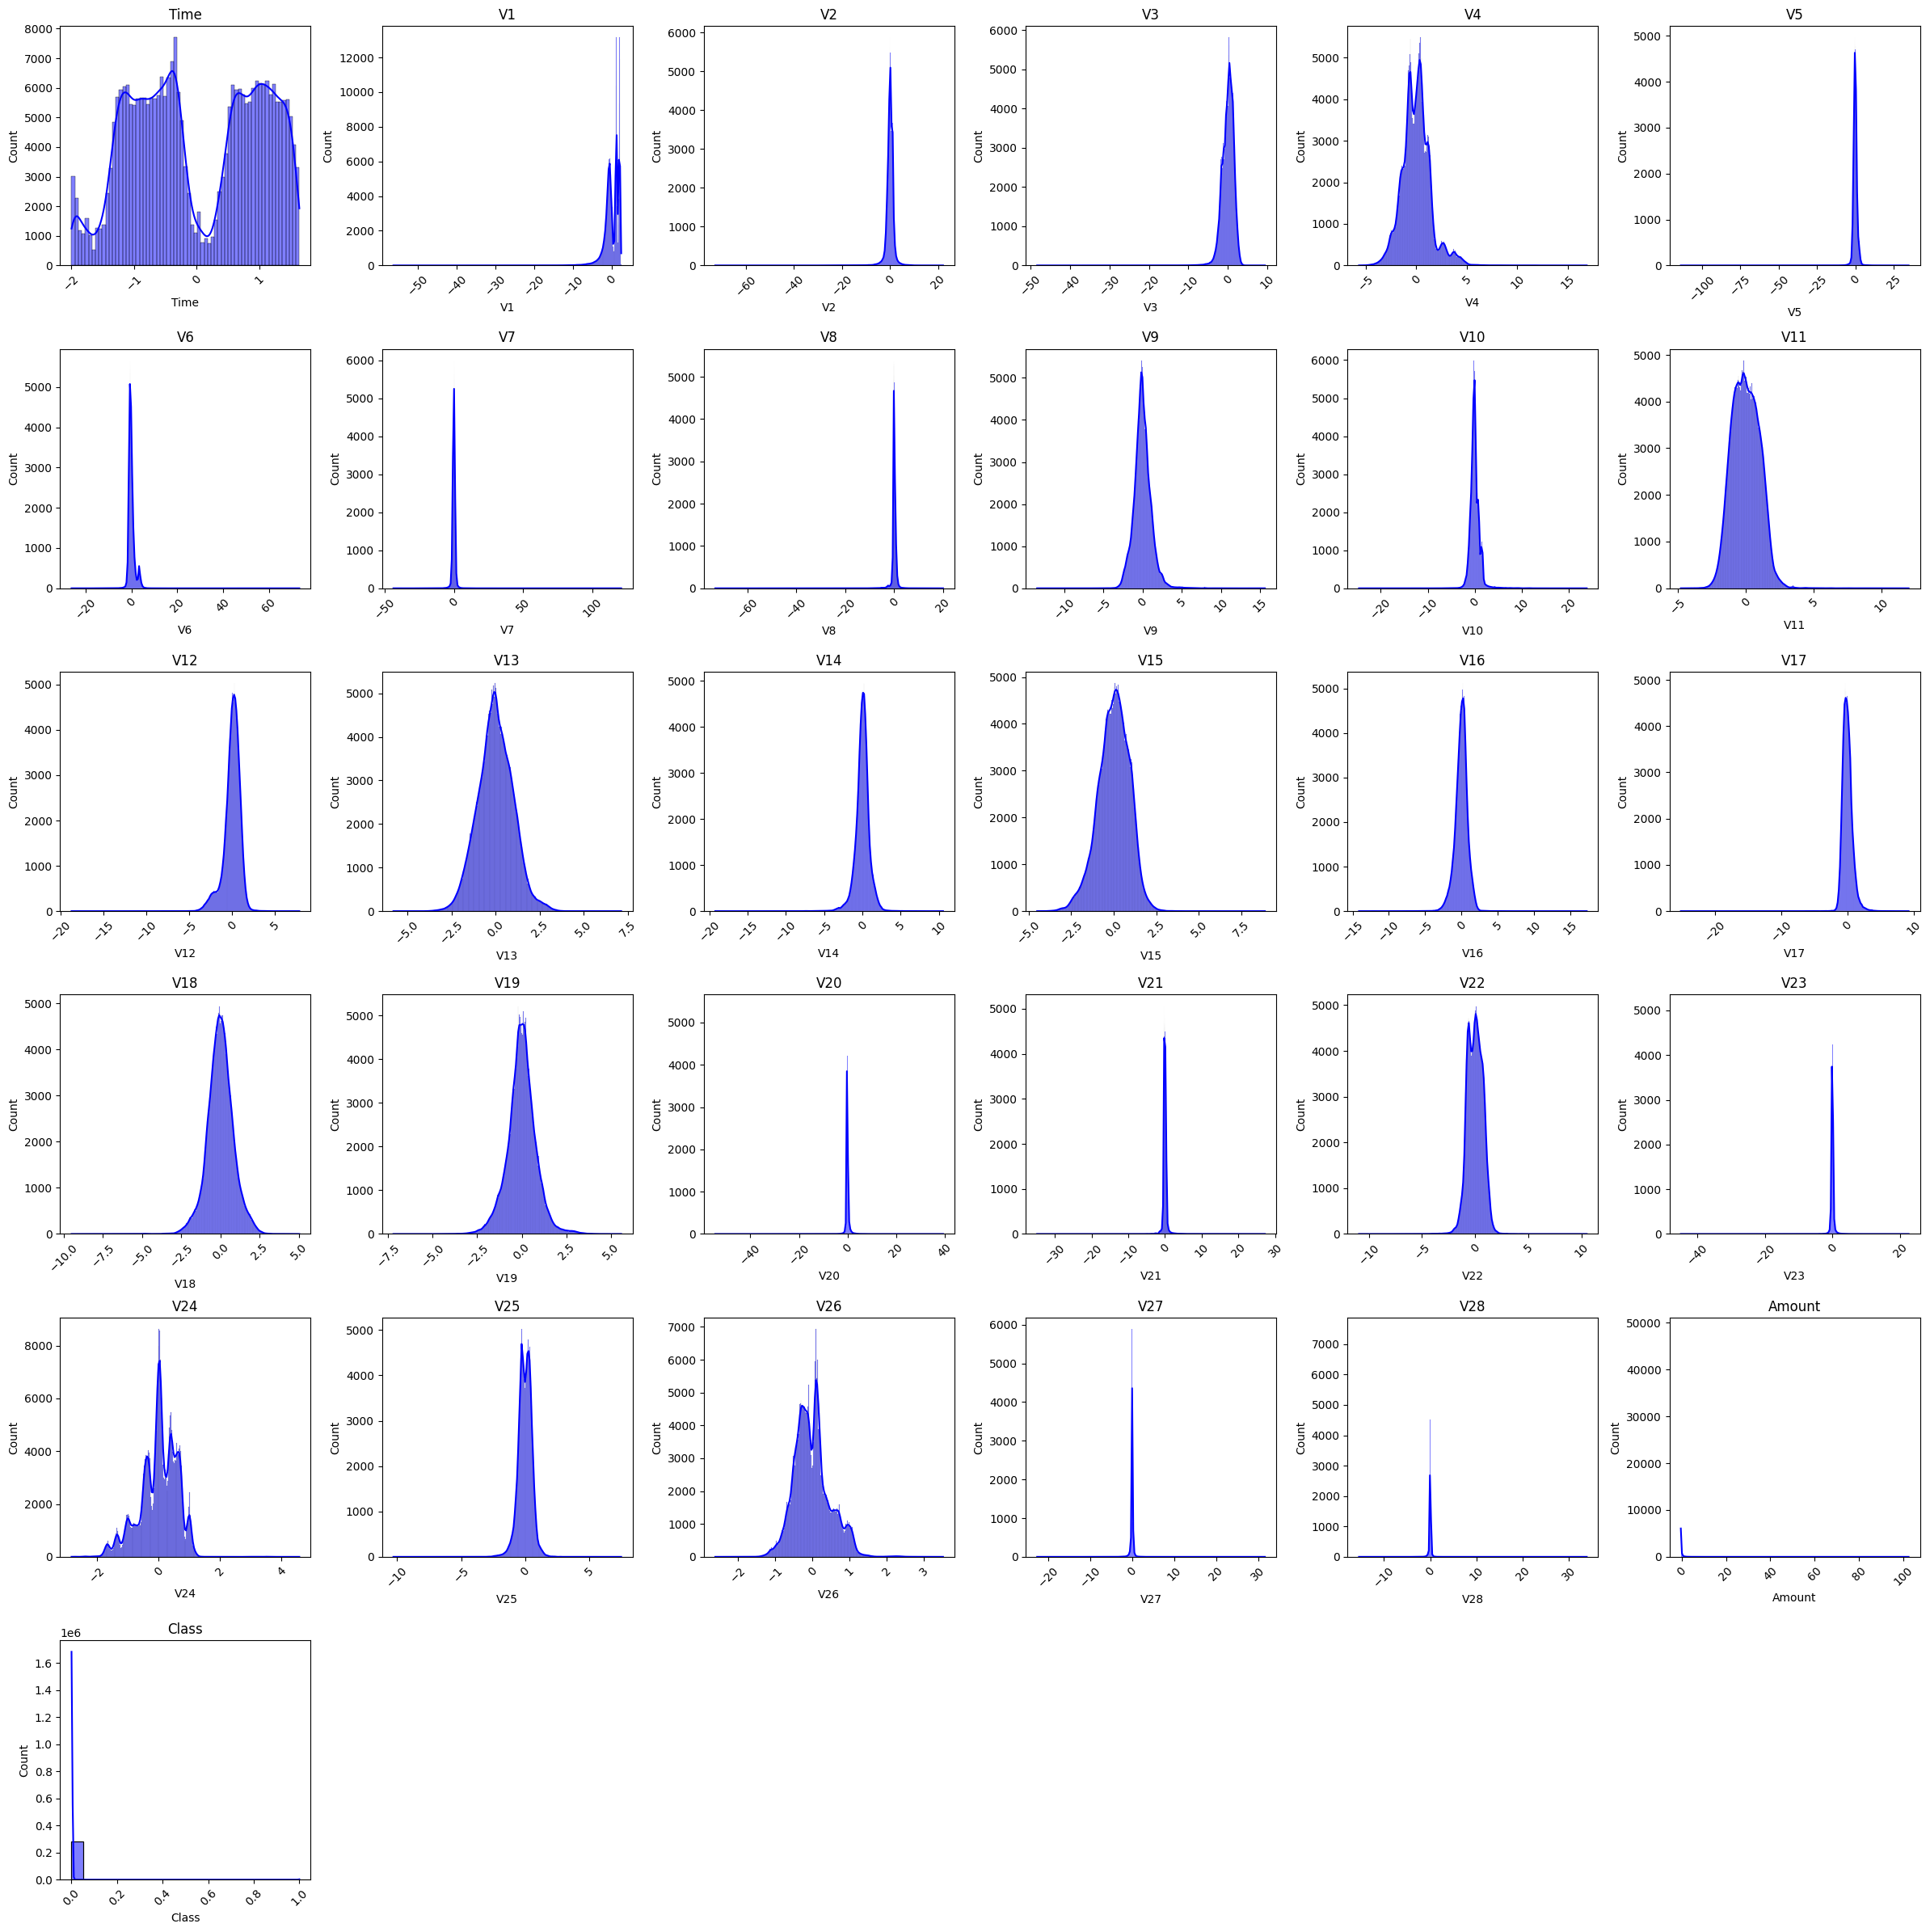

In [36]:
def plot_feature_histograms(df):
    features = df.columns
    num_features = len(features)

    # Fixed number of columns
    num_cols = 6
    # Calculate the number of rows needed
    num_rows = -(-num_features // num_cols)  # Ceiling division

    plt.figure(figsize=(num_cols * 4, num_rows * 4))

    for i, feature in enumerate(features):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.histplot(df[feature], kde=True, color='blue')
        plt.title(feature)
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_feature_histograms(df)

## Outliers Detection

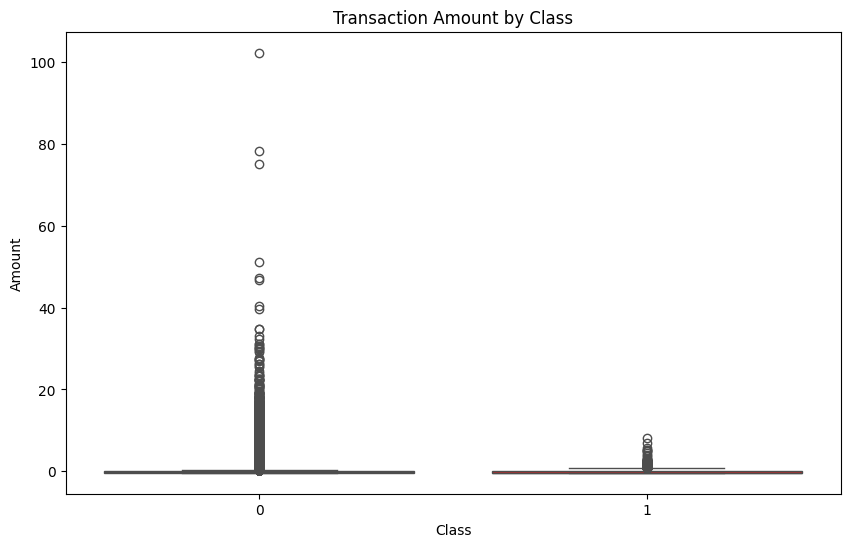

In [31]:
# Amount vs Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette=["blue", "red"])
plt.title('Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()


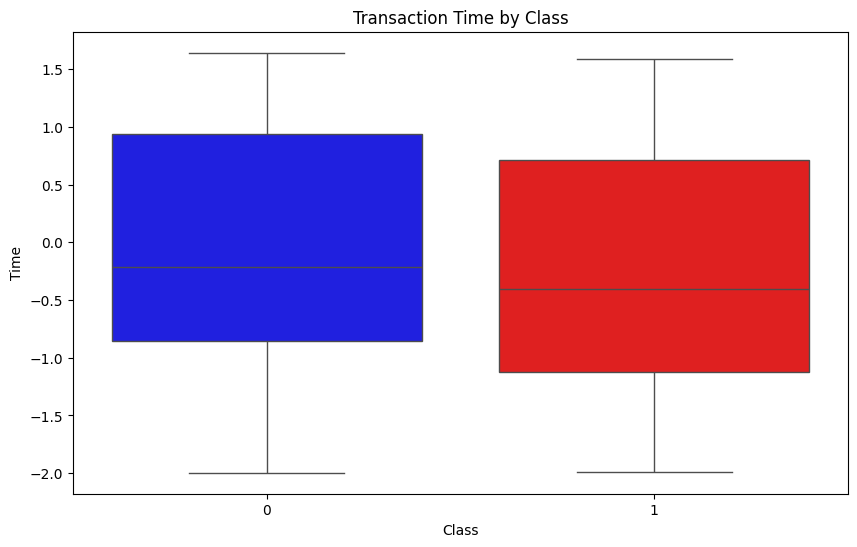

In [35]:
#Time vs Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Time', data=df, palette=["blue", "red"])
plt.title('Transaction Time by Class')
plt.xlabel('Class')
plt.ylabel('Time')
plt.show()


# Transaction Time Distribution

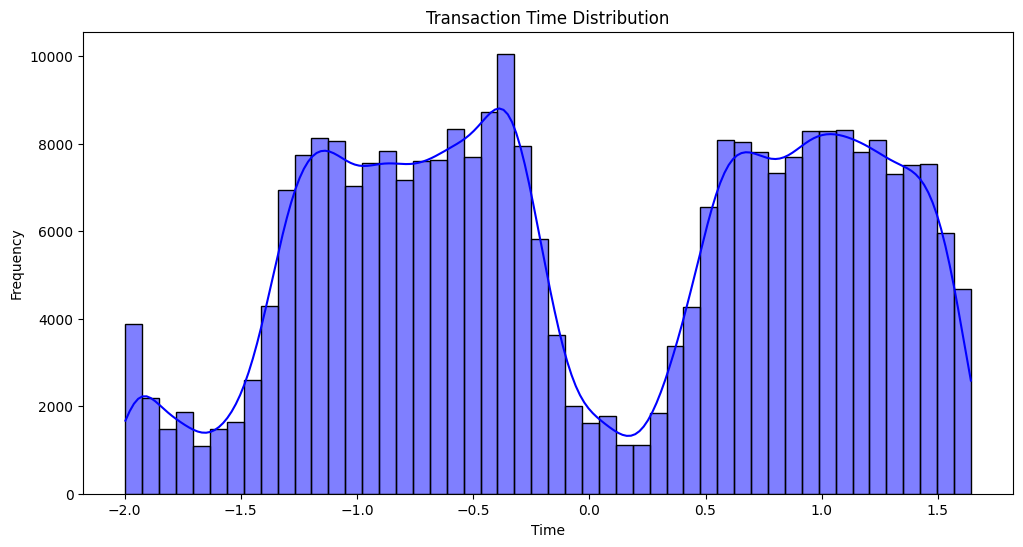

In [32]:

plt.figure(figsize=(12, 6))
sns.histplot(df['Time'], bins=50, kde=True, color='blue')
plt.title('Transaction Time Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


# Transaction Amount Distribution

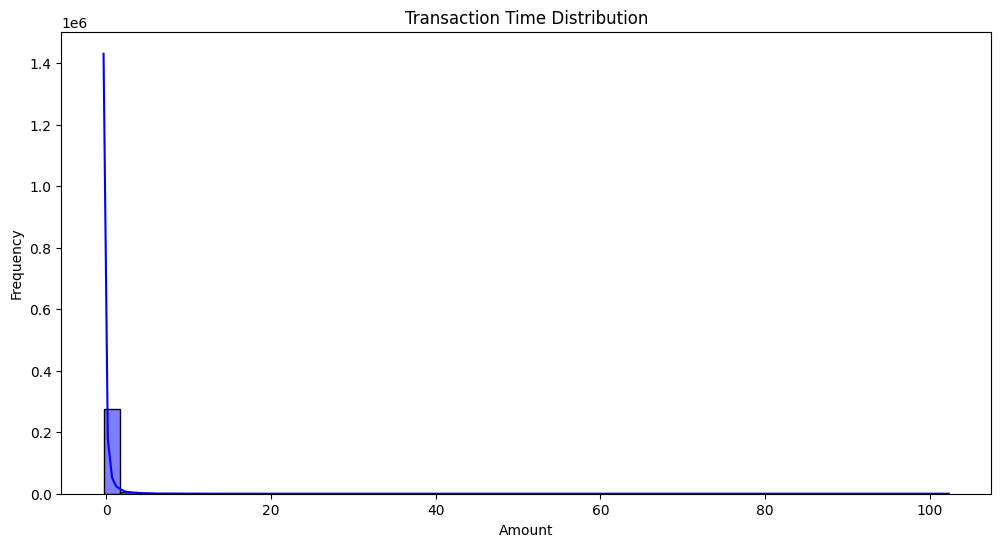

In [37]:

plt.figure(figsize=(12, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title('Transaction Time Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

## correlation Matrix

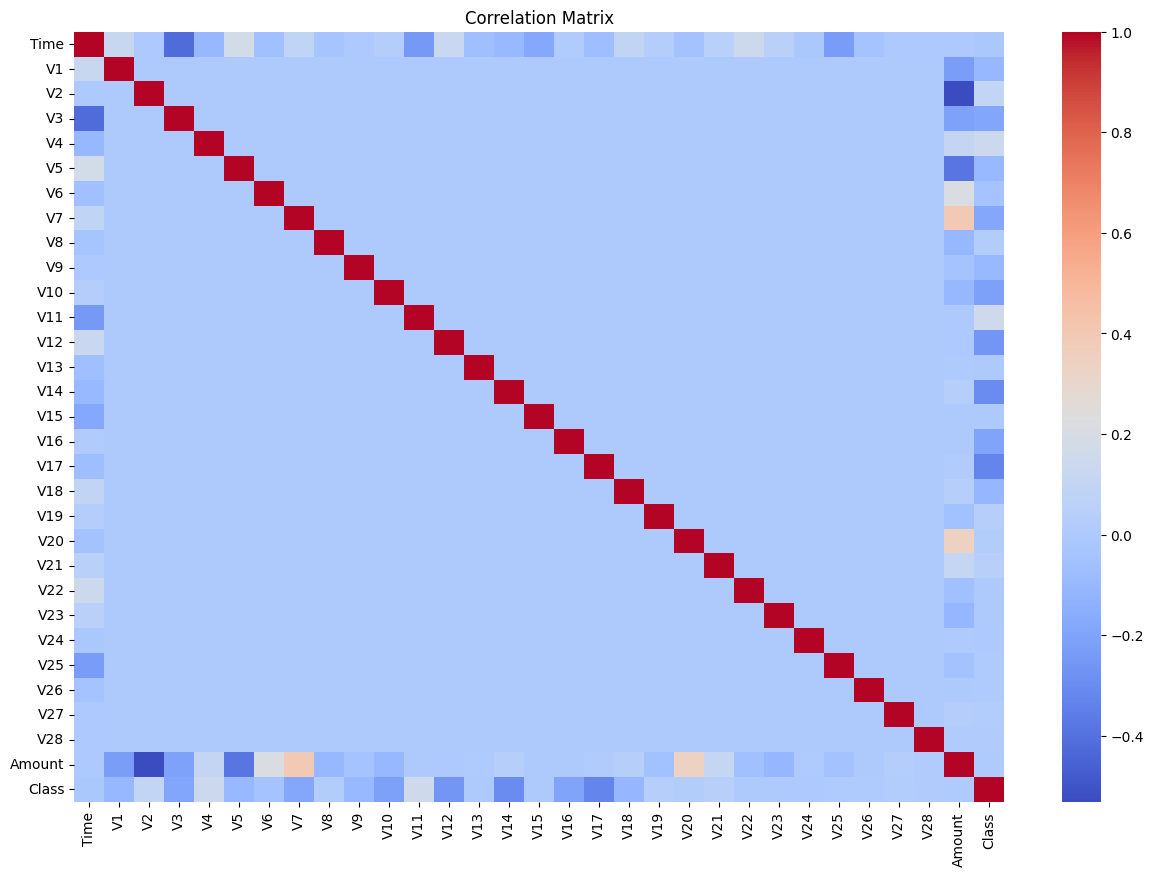

In [33]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## visualising the Class Imbalanced

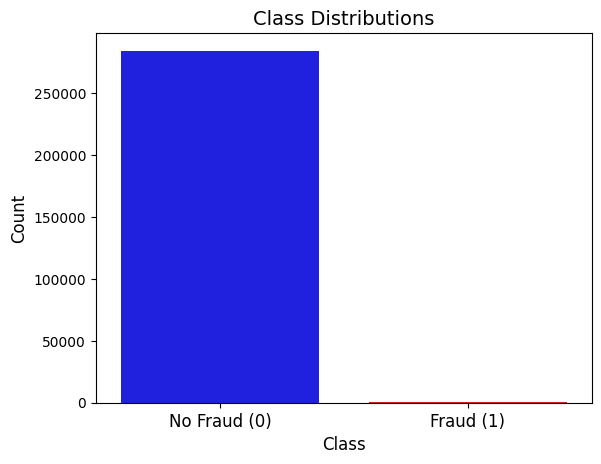

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["blue", "red"]

ax = sns.countplot(x='Class', data=df, palette=colors)

plt.title('Class Distributions', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

ax.set_xticklabels(['No Fraud (0)', 'Fraud (1)'], fontsize=12)

plt.show()

this dataset is highly imbalanced

## Standard Scaling 'Amount' and 'Time'

In [10]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = sc.fit_transform(df['Time'].values.reshape(-1,1))



In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## undersampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

## Separate and sample data

In [12]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
legit_sample = legit.sample(n=492)
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [13]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,-0.000234
std,0.999942
min,-0.353229
25%,-0.330640
50%,-0.265271
75%,-0.045177
max,102.362243


In [14]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,0.135382
std,1.026242
min,-0.353229
25%,-0.349231
50%,-0.316247
75%,0.070128
max,8.146182


## Displaying the new dataset info

In [15]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
47925,-1.082269,-0.955067,-0.786220,1.792170,0.102035,1.494494,-1.167737,-0.123941,-0.760129,0.736714,...,-0.132494,0.492419,-0.665390,-0.003595,-0.584005,0.382134,-0.400736,-0.766325,-0.289260,0
246030,1.225427,1.877008,-1.362815,-1.355399,-0.354695,-0.738957,-0.334428,-0.484908,-0.162023,-0.086336,...,0.016254,0.306658,-0.066891,0.517534,-0.053416,0.885628,-0.079507,-0.030703,0.322247,0
98537,-0.592041,1.212048,0.213040,0.488086,0.570974,-0.272658,-0.515972,0.006189,-0.083225,-0.000243,...,-0.224988,-0.608988,0.160479,0.076424,0.152703,0.123035,-0.011304,0.016672,-0.335278,0
77394,-0.795650,-6.693139,-10.766035,-2.987500,0.194394,-10.271559,7.105632,12.256810,-0.696877,-1.456405,...,2.421661,0.797837,8.822818,-1.085853,0.554201,-0.722822,-1.198825,0.221137,14.410743,0
115046,-0.444024,-0.722031,0.730745,1.001990,-0.002500,-0.203996,-1.097598,0.066066,0.231919,-0.697471,...,0.271777,0.643172,-0.111686,0.517464,-0.494326,1.103811,-0.032761,0.031029,-0.343794,0


In [16]:
new_dataset['Class'].value_counts()


,count
Class,
0,492
1,492


In [17]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.039481,0.061459,0.033846,-0.012943,-0.020317,-0.099105,-0.090798,0.046006,0.049745,-0.036703,...,-0.008099,0.008721,-0.001581,0.039702,-0.011084,-0.013906,-0.002423,0.018295,-0.014360,-0.025110
1,-0.296223,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.135382


## Visulaizing the new Dataset Class Distribution

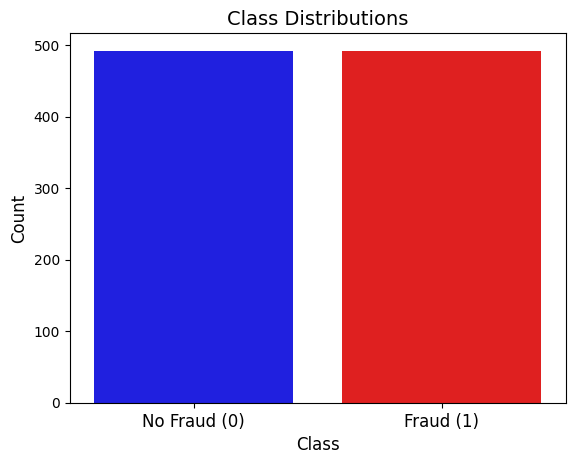

In [18]:
# Distribution of transactions in the new dataset
sns.countplot(x='Class', data=new_dataset, palette=["blue", "red"])
plt.title('Class Distributions', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Fraud (0)', 'Fraud (1)'], fontsize=12)
plt.show()

# separating the features and class

In [20]:
X = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

## Splitting the dataset into training and test set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply PCA for dimensionality reduction

In [22]:
pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# train the model

In [23]:
# Logistic Regression Model
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


Accuracy score on Test Data: 0.9441624365482234


# model Evalution

In [ ]:
print('Accuracy score on Test Data:', accuracy_score(y_test, y_pred))

Creating confusion matrix

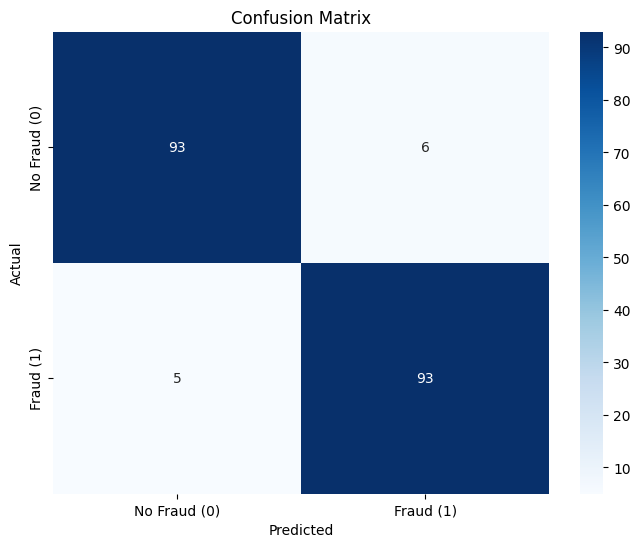

In [24]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud (0)', 'Fraud (1)'], yticklabels=['No Fraud (0)', 'Fraud (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Grid Search with Cross-Validation

In [25]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300, 500, 1000, 1200]
}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.9340833283631722


In [29]:

from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate evaluation metrics
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('precision score:' ,precision_score(y_test, y_pred))
print('recall score:' ,recall_score(y_test, y_pred))
print('f1 score:' ,f1_score(y_test, y_pred))

Accuracy score: 0.9441624365482234
precision score: 0.9393939393939394
recall score: 0.9489795918367347
f1 score: 0.9441624365482234
